<a href="https://colab.research.google.com/github/jacksonns/IMBD-Data-Visualization/blob/main/imbd_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processando Conjuntos de Dados do IMDB

## Baixando Conjuntos de Dados

In [1]:
import urllib
import gzip
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def download_and_extract(file_name):
  base_url = 'https://datasets.imdbws.com/'
  url = base_url + file_name + '.gz'
  with urllib.request.urlopen(url) as response:
    # Decompress file
    with gzip.GzipFile(fileobj=response) as uncompressed:
      file_content = uncompressed.read()
    # write to file in binary mode 'wb'
    with open(file_name, 'wb') as f:
      f.write(file_content)

In [4]:
datasets = ['name.basics.tsv', 'title.akas.tsv', 'title.basics.tsv', 
            'title.crew.tsv', 'title.episode.tsv', 'title.principals.tsv', 
            'title.ratings.tsv']

for file in datasets:
  download_and_extract(file)



## Explorando 'Title Basics'

Tabela com 9.861.052 linhas, contendo diferentes tipos de obras ('short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot')

In [2]:
titles = pd.read_csv('title.basics.tsv', sep='\t')
titles.head()

<ipython-input-2-2edac2f4f7dc>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  titles = pd.read_csv('title.basics.tsv', sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [3]:
len(titles.index)

9861052

In [4]:
# Tipos de obras no dataset.
title_types = titles['titleType'].unique()
title_types

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

É possível perceber que a maioria das obras estão na categoria tvEpisode. Podemos ignorá-las a princípio para reduzir o tamanho dos dados




Text(0.5, 1.0, 'Tipos de obras')

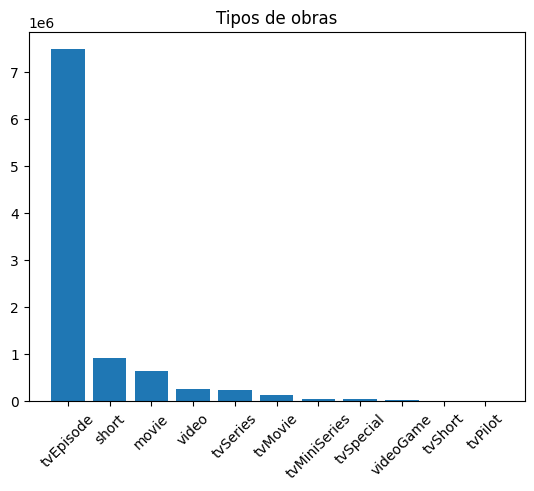

In [6]:
count_titles = titles['titleType'].value_counts().sort_values(ascending=False)
plt.bar(count_titles.index, count_titles.values)
plt.xticks(rotation=45)
plt.title('Tipos de obras')

Considerando apenas a categoria filme ('movie'). São 645.594 obras nessa categoria

In [7]:
movies = titles.query(" titleType == 'movie' ")
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama


In [8]:
len(movies.index)

645594

Visualizando curva de quantidade de filmes por ano

In [9]:
nan_index = movies[movies['startYear'] == '\\N'].index
movies_with_year = movies.drop(nan_index)
year_counts = movies_with_year['startYear'].value_counts().sort_index()
year_counts

1894     1
1896     1
1897     2
1898     7
1899     8
        ..
2026    30
2027    11
2028     1
2029     3
2030     1
Name: startYear, Length: 136, dtype: int64

Text(0.5, 1.0, 'Quantidade de filmes por ano')

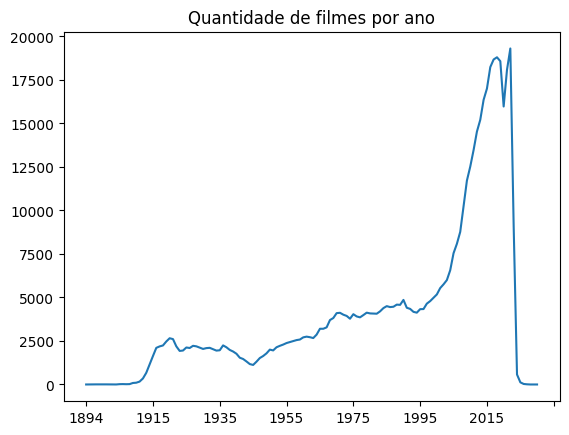

In [10]:
year_counts.plot()
plt.title('Quantidade de filmes por ano')

Visualizando distribuição de gêneros dos filmes

In [11]:
# Considerando apenas filmes que possuem pelo o menos um gênero associado
nan_genres = movies[movies['genres'] == '\\N'].index
movies_with_genres = movies.drop(nan_genres)
len(movies_with_genres)

573518

In [12]:
# Obtendo todas os gêneros únicos considerados
movies_genres_column = movies_with_genres['genres'].str.split(',')
unique_genres = np.unique(np.concatenate(movies_genres_column.values))
unique_genres 

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Talk-Show', 'Thriller', 'War', 'Western'], dtype='<U11')

In [21]:
# Contando número de filmes de cada gênero (1 filme pode ter mais de um gênero)
genres_expanded = movies_genres_column.explode().value_counts()
genres_expanded

Drama          234161
Documentary    122414
Comedy         109141
Action          53867
Romance         47295
Thriller        44690
Crime           37216
Horror          36954
Adventure       28100
Family          17656
Biography       17244
Mystery         16990
Fantasy         15334
History         14257
Sci-Fi          13919
Music           13613
Musical         10229
War              9275
Adult            9243
Animation        9088
Western          8147
Sport            7107
News             1446
Film-Noir         881
Reality-TV        514
Talk-Show         175
Short              55
Game-Show          26
Name: genres, dtype: int64

Text(0.5, 1.0, 'Distribuição de gêneros dos filmes')

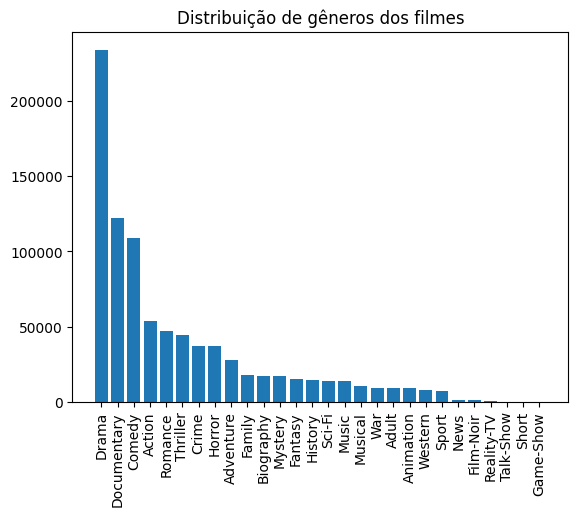

In [23]:
plt.bar(genres_expanded.index, genres_expanded.values)
plt.xticks(rotation=90)
plt.title('Distribuição de gêneros dos filmes')